<a href="https://colab.research.google.com/github/k4ilham/machineLearning/blob/main/HandsOn_Basic_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving CountryCluster.csv to CountryCluster (2).csv


In [ ]:
import io

df = pd.read_csv(io.BytesIO(uploaded['CountryCluster.csv']))
print(df)

     Country  Latitude  Longitude Language
0        USA     44.97    -103.77  English
1     Canada     62.40     -96.80  English
2     France     46.75       2.40   French
3         UK     54.01      -2.53  English
4    Germany     51.15      10.40   German
5  Australia    -25.45     133.11  English


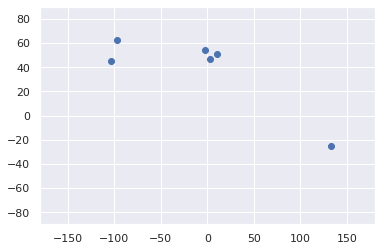

In [ ]:
plt.scatter(df['Longitude'],df['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [ ]:
#feature selection
x = df.iloc[:,1:3] # 1t for rows and second for columns
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [ ]:
#set n_cluster
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [ ]:
#fit prediction
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 0, 0, 2], dtype=int32)

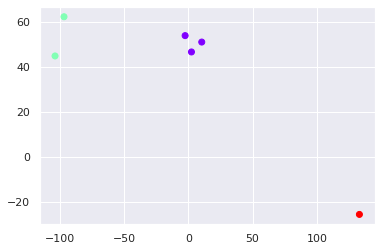

In [ ]:
#clustering prediction
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

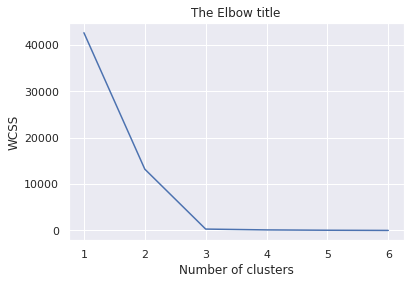

In [ ]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')